In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Rulkov Map

In [2]:
def rulkov_map(alpha, sigma, steps, x0, y0, mu = 0.001):
    x = np.zeros(steps)
    y = np.zeros(steps)
    x[0] = x0
    y[0] = y0

    for n in range(steps - 1):
        if x[n] <= 0:
            x[n + 1] = (alpha / (1 - x[n])) + y[n]
        elif 0 < x[n] < alpha + y[n]:
            x[n + 1] = alpha + y[n]
        else:
            x[n + 1] = -1

        y[n + 1] = y[n] - mu * (x[n] + 1) + mu * sigma

    return x, y

In [237]:
# helper function to plot a single case of the rulkov map
def plot_rulkov_case(alpha, sigma, title, steps = 2000, mu = 0.001):
    # Initialize plotting
    plt.figure(figsize=(8, 6))

    x,y = rulkov_map(alpha, sigma=sigma, steps=steps, x0= -1.74, y0= -3.93, mu = mu)
    plt.plot(x)
    plt.title(f'{title}')
    plt.xlabel('Time Steps')
    plt.ylabel('Membrane Potential (x)')
    plt.ylim(-2, 5)  # Set y-limits to visualize behavior clearly

    plt.tight_layout()
    plt.show()

In [238]:
# helper function to plot x values of the rulkov map for different alpha and sigma values
def plot_rulkov_map(alpha_values, sigma_values, steps = 2000, length = 15, width = 10, y_lim_neg = -3, mu = 0.001):
    # Initialize plotting
    plt.figure(figsize=(length, width))

    # Loop through alpha and sigma values
    for i, alpha in enumerate(alpha_values):
        for j, sigma in enumerate(sigma_values):
            x,y = rulkov_map(alpha, sigma=sigma, steps=steps, x0= -1.74, y0= -3.93, mu = mu)
            plt.subplot(len(alpha_values), len(sigma_values), i * len(sigma_values) + j + 1)
            plt.plot(x)
            plt.title(f'\u03B1={alpha:.2f}, \u03C3={sigma:.2f}')
            plt.xlabel('Time Steps')
            plt.ylabel('Membrane Potential (x)')
            plt.ylim(y_lim_neg, 5)  # Set y-limits to visualize behavior clearly

    plt.tight_layout()
    plt.show()

### Initial Considerations

These are the assumptions made based upon information from the original paper by Rulkov (2001) 

1. Value of *$\mu$* is taken as **0.001** to model the slow time evolution of $y_{n}$.
2. We have taken the intial starting point as $(x_{0},y_{0}) = (-1.74,-3.93)$.
3. We investigate the **burst-spiking** behaviour for parameter ranges with **$\alpha$ > 4**.
4. We investigate the **tonic spiking** and **periods of silence** behaviour for parameter ranges with **$\alpha$ < 4**.

We also draw inferences on range of (𝛼, 𝜎) using the following diagram: 

<img src="./bifurcation.png" alt="bifurcation" width="400" />

where the boundary between the silent region and spiking is given by $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$

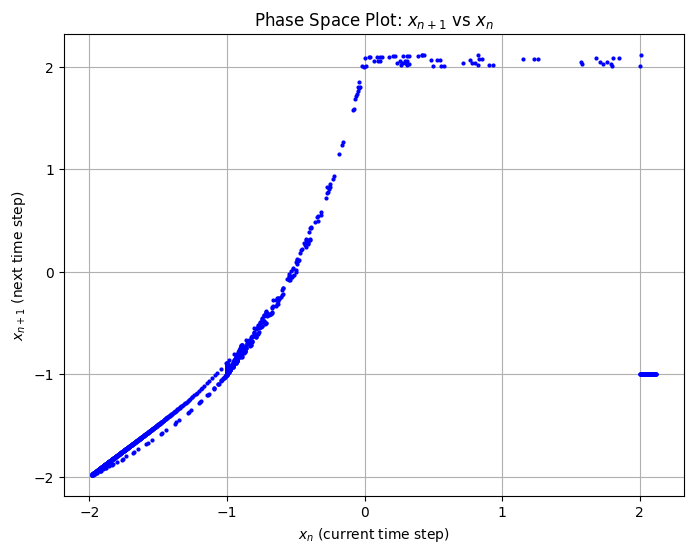

In [60]:
x, y = rulkov_map(6, 0.01, 1000, x0=-1.74, y0=-3.93)

# Plot x versus x lagged by 1 (x_n vs x_n+1)
plt.figure(figsize=(8, 6))
plt.plot(x[:-1], x[1:], 'o', markersize=2, color='blue')

plt.title('Phase Space Plot: $x_{n+1}$ vs $x_n$')
plt.xlabel('$x_n$ (current time step)')
plt.ylabel('$x_{n+1}$ (next time step)')
plt.grid(True)
plt.show()

We can see from the above plot how the discontinuity of f models the behaviour of x for a particular set of parameters.

### A) Bursts-of-Spiking Behaviour

#### Example Case ($\alpha = 5.0, \sigma = 0.2$)

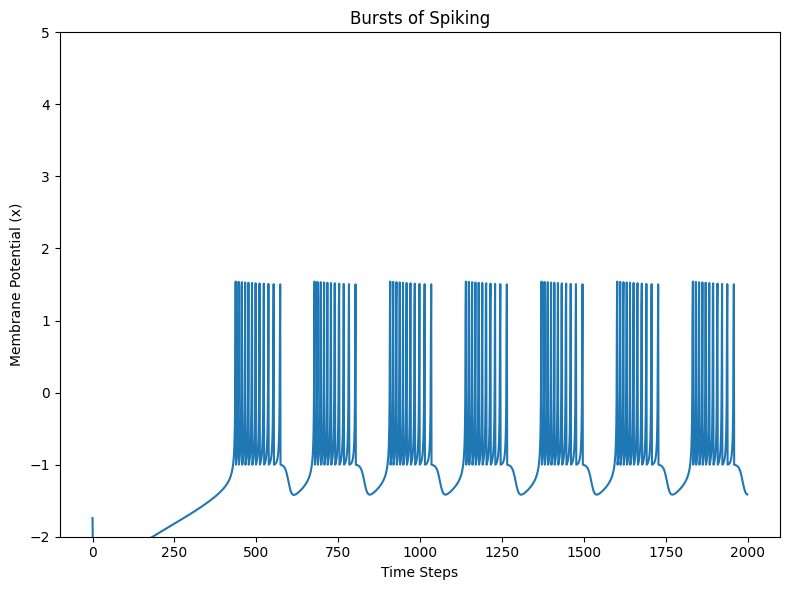

In [77]:
plot_rulkov_case(5.0,0.2, "Bursts of Spiking")

We can clearly see bursts of spikes, with burst length near 100-150 time steps.

#### Experimentation

We will empircally test for which values of $\alpha$ and $\sigma$ the bursts of spikings behaviour holds.

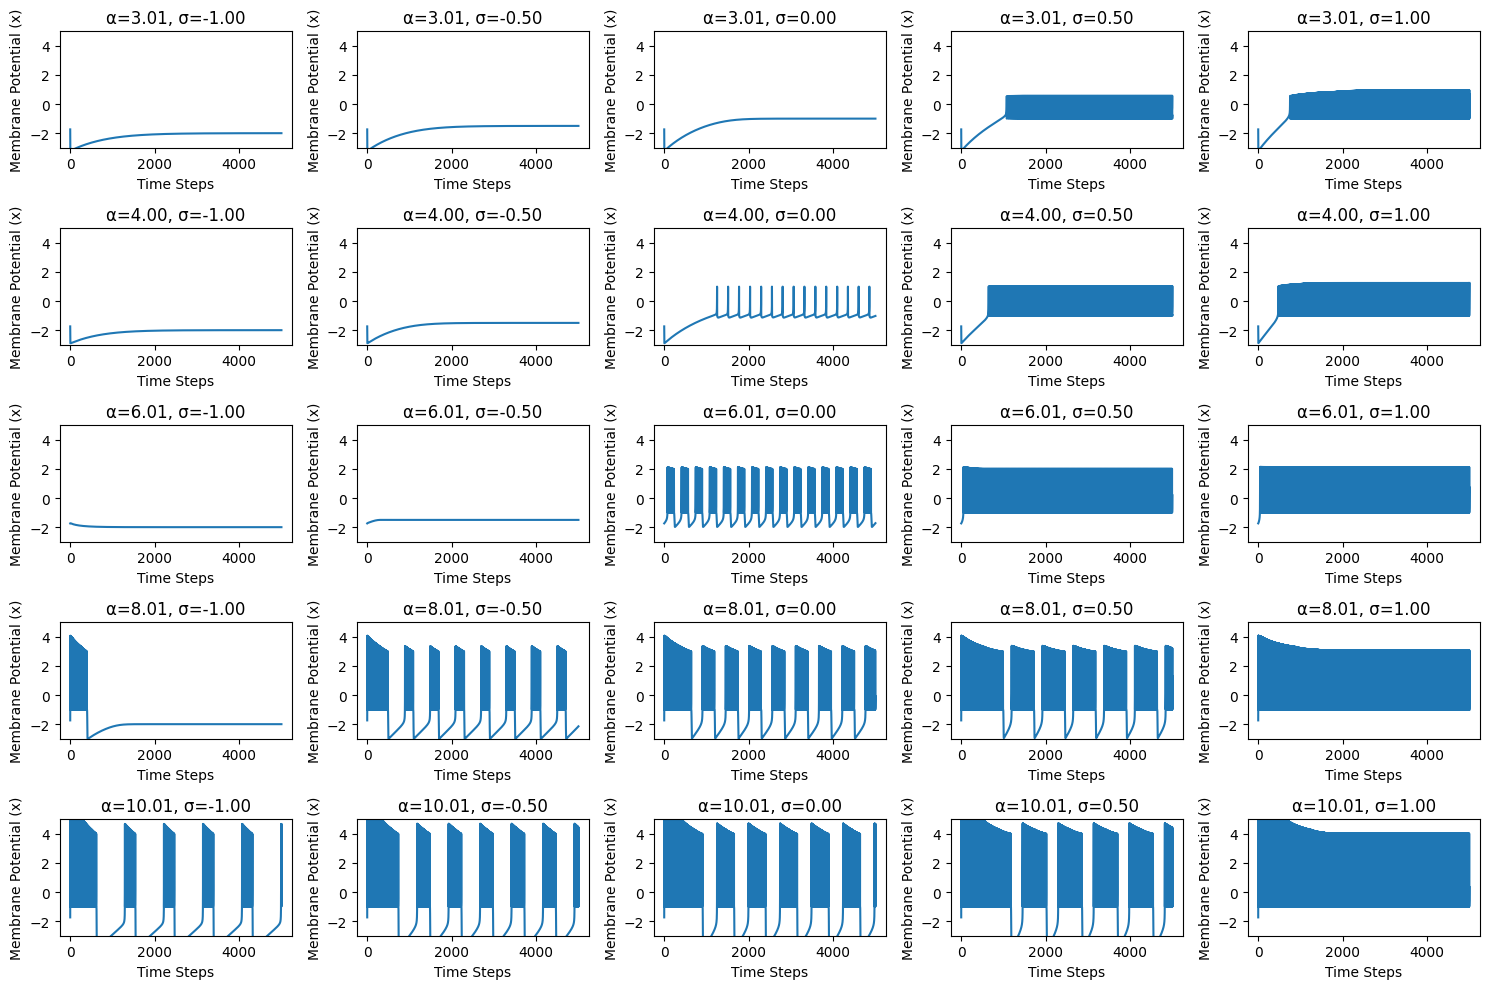

In [160]:
# Set parameters for the exploration

alpha_values = [3.01, 4.0, 6.01, 8.01, 10.01]    
sigma_values = [-1, -0.5, 0.0, 0.5, 1]

plot_rulkov_map(alpha_values, sigma_values, 5000)

**Key Observations** : 

1. For values of $\alpha$ < 4, we clearly see no bursts of spiking behaviour (irrespective of $\sigma$).
2. As $\alpha$ increases, the band of permissible values of $\sigma$ also increases.
3. For a given $\alpha$, if $\sigma$ is too small, it leads to **silenct behaviour**. If $\sigma$ is too big, it leads to **destabilized oscillations**.

**We now try to find the bounds of $\sigma$ for a given $\alpha$**

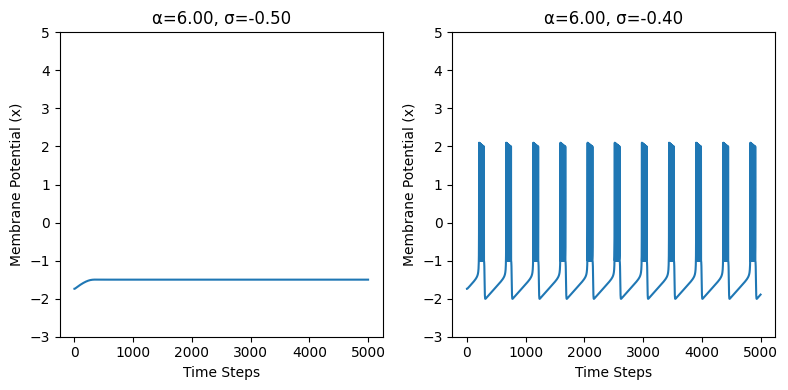

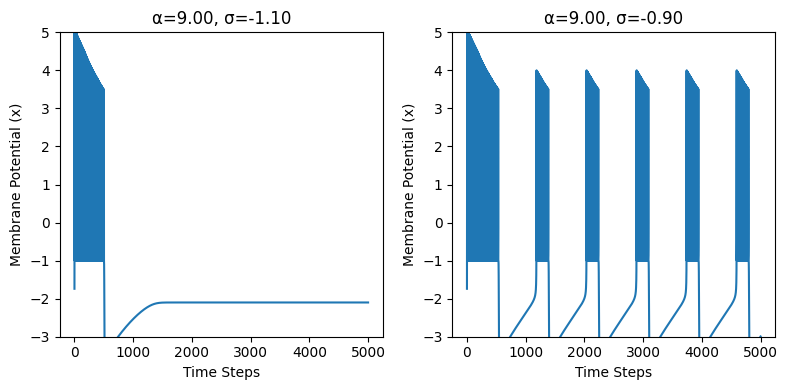

In [94]:
alpha_values = [6]              # 𝜎_th = 2 - 𝛼^0.5 = -0.45
sigma_values = [-0.5, -0.4]
plot_rulkov_map(alpha_values, sigma_values, steps = 5000, length=8, width=4)
alpha_values = [9]              # 𝜎_th = 2 - 𝛼^0.5 = -1
sigma_values = [-1.1, -0.9]
plot_rulkov_map(alpha_values, sigma_values, steps = 5000, length=8, width=4)

We can clearly see as $\sigma$ falls below $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$, the bursts-of-spikes behaviour disappears into a silent region behaviour. So the lower bound on $\sigma$ seems valid.

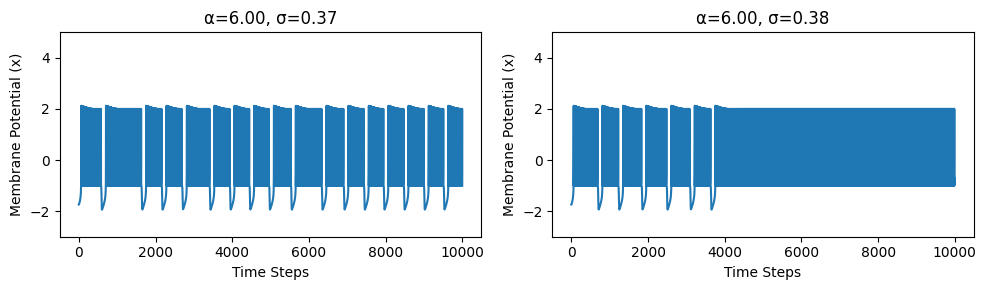

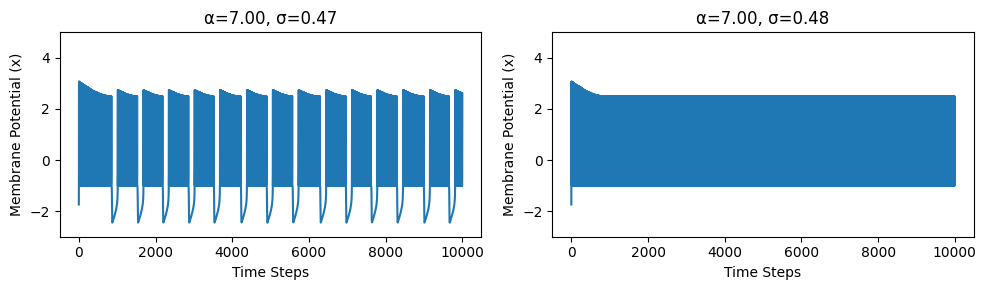

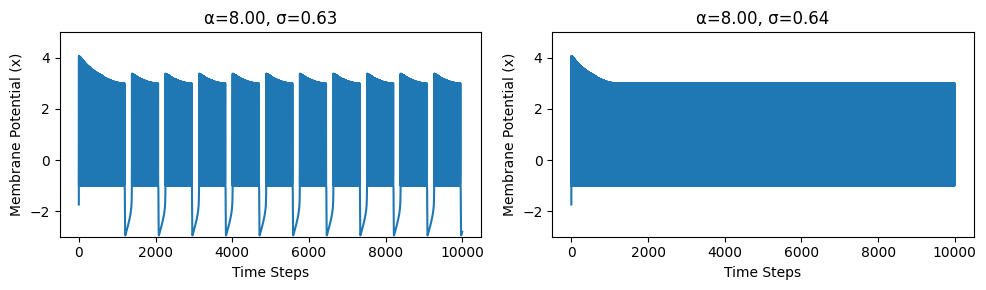

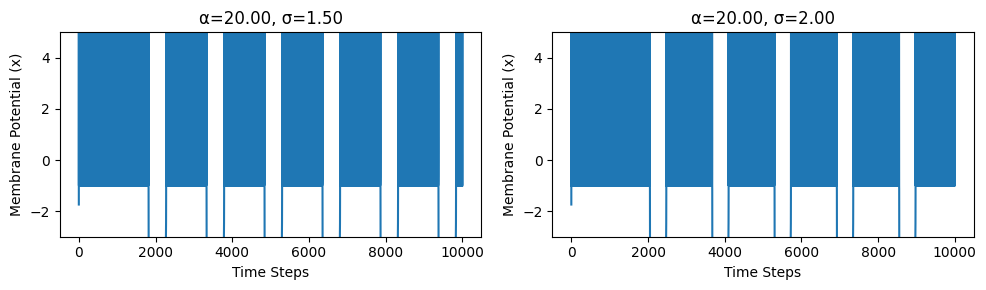

In [159]:
alpha_values = [6]              
sigma_values = [0.37, 0.38]
plot_rulkov_map(alpha_values, sigma_values, steps = 10000, length=10, width=3)
alpha_values = [7]              
sigma_values = [0.47, 0.48]
plot_rulkov_map(alpha_values, sigma_values, steps = 10000, length=10, width=3)
alpha_values = [8]              
sigma_values = [0.63, 0.64]
plot_rulkov_map(alpha_values, sigma_values, steps = 10000, length=10, width=3)
alpha_values = [20]              
sigma_values = [1.5, 2.0]
plot_rulkov_map(alpha_values, sigma_values, steps = 10000, length=10, width=3)

As we increase $\alpha$ from *6 to 8*, the upper bound on $\sigma$ increases from about *0.37 to 0.64*. Clearly the **$\sigma_{upper}$ is some positive function of $\alpha$**. \
Possibly of the form: $\sigma_{upper} = a.(\alpha - 4)^{b}$ where $b \in (0,1)$.

Finally, we have also included the final case of $\alpha = 20$ to show even for very high values of $\alpha$, the value of $\sigma$ is not holding to some asymptote.

**Conclusions** 

1. $\alpha$ must be greater than 4 for bursts of spikes to occur.
2. Lower bound on $\sigma$ follows $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$.
3. Upper bound on $\sigma$ is some positive polynomial function of $\alpha$.

### B) Tonic Spiking Behaviour

#### Example Case ($\alpha = 3.0 , \sigma = 0.5$)

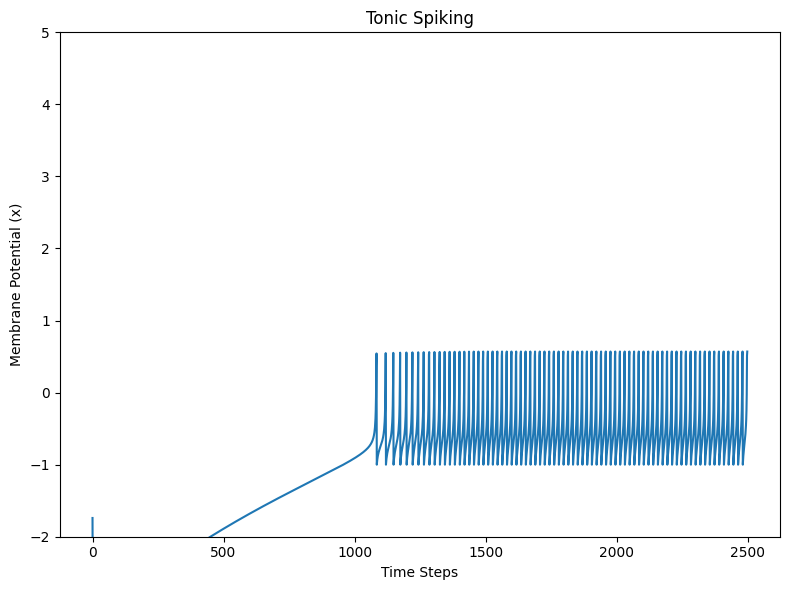

In [173]:
plot_rulkov_case(3.0,0.5, "Tonic Spiking", steps = 2500)

We can clearly see regular spikes of membrane potential, after an intial period of clamped output.

#### Experimentation

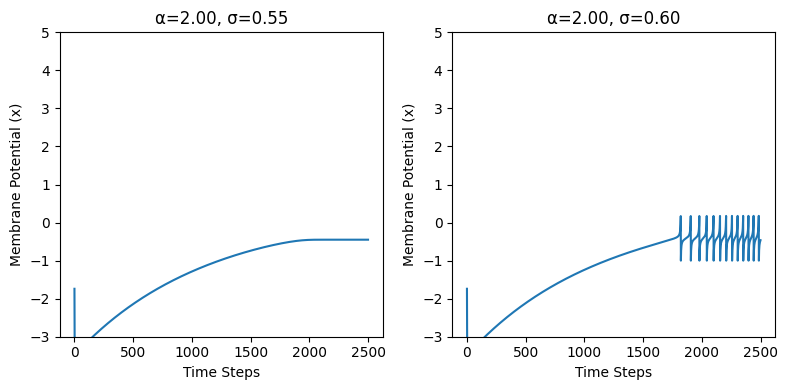

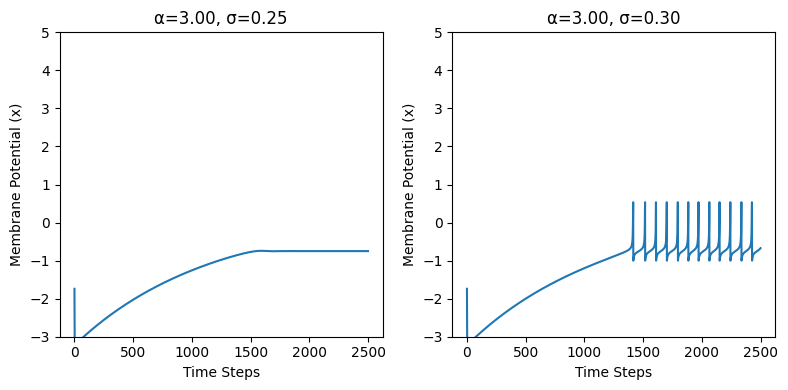

In [211]:
alpha_values = [2]              # 𝜎_th = 2 - 𝛼^0.5 = 0.58
sigma_values = [0.55, 0.6]
plot_rulkov_map(alpha_values, sigma_values, steps = 2500, length=8, width=4)
alpha_values = [3]              # 𝜎_th = 2 - 𝛼^0.5 = 0.27
sigma_values = [0.25, 0.30]
plot_rulkov_map(alpha_values, sigma_values, steps = 2500, length=8, width=4)

Again, if $\sigma$ is lower than $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$, then spiking behaviour disappears into silence.

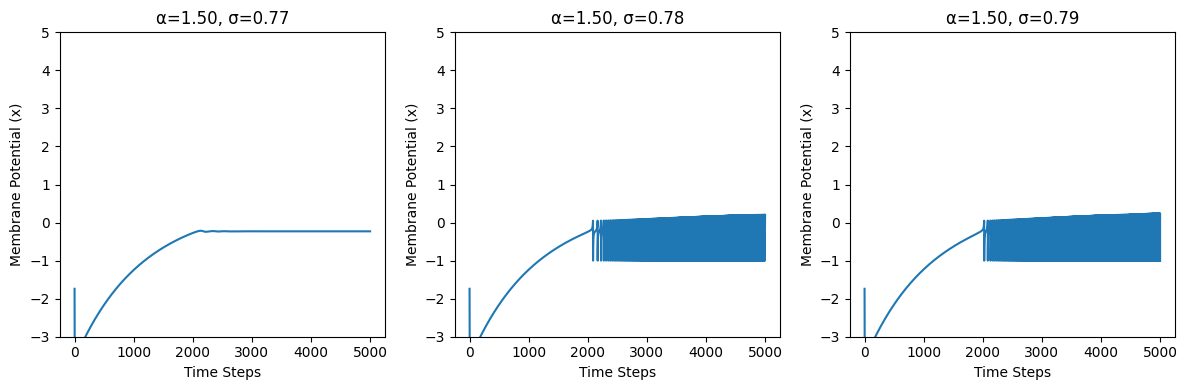

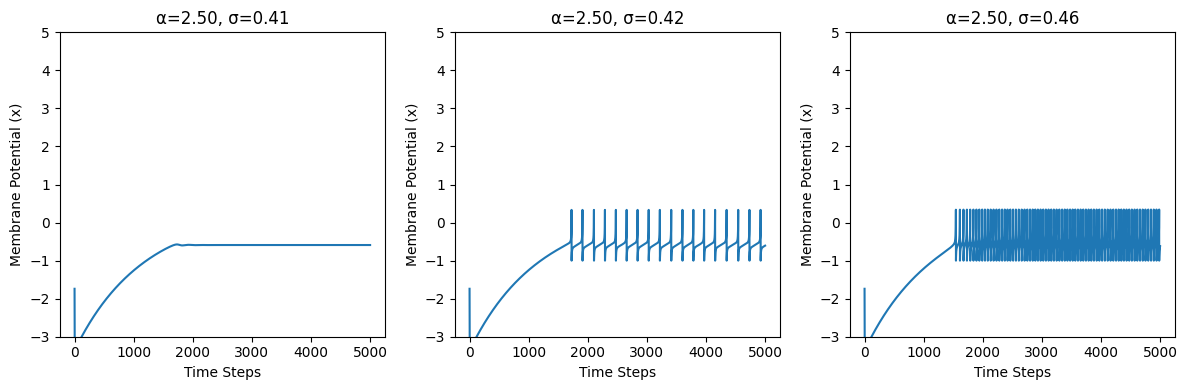

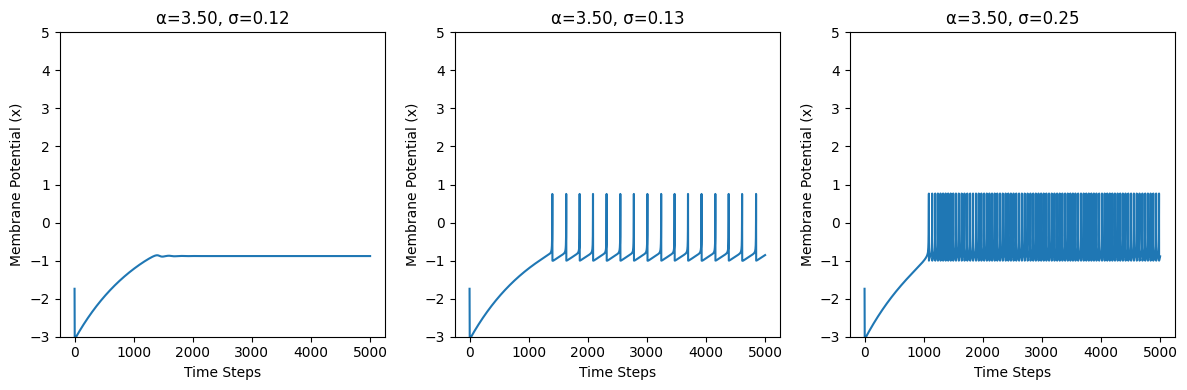

In [204]:
alpha_values = [1.5]           
sigma_values = [0.77, 0.78,0.79]
plot_rulkov_map(alpha_values, sigma_values, steps = 5000, length=12, width=4)
alpha_values = [2.5]           
sigma_values = [0.41, 0.42,0.46]
plot_rulkov_map(alpha_values, sigma_values, steps = 5000, length=12, width=4)
alpha_values = [3.5]           
sigma_values = [0.12, 0.13,0.25]
plot_rulkov_map(alpha_values, sigma_values, steps = 5000, length=12, width=4)

**Observations**

1. $\alpha$ must be smaller than or equal to 4 for tonic spiking behaviour.
2. $\sigma$ must be greater than $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$ for spiking, otherwise leads to silent behaviour.
3. For a given $\alpha$, as we increase $\sigma$, the oscillations become more rapid, eventually leading to destablization.
4. As $\alpha$ increases, the destabilization occurs for yet smaller values of $\sigma$.
5. **There is not clear boundary/distinction between tonic spiking and destablization.**

### C) Periods of Silence

#### Example Case ($\alpha = 2.0, \sigma = -0.01$)

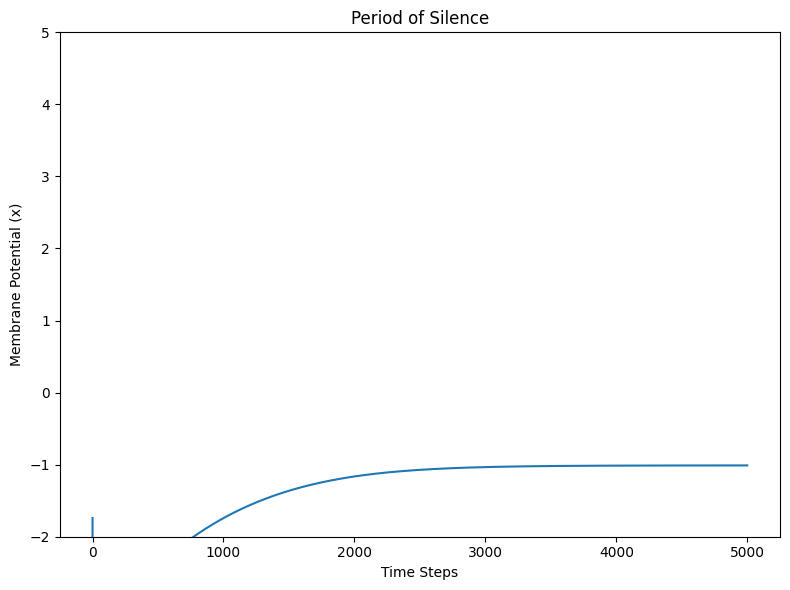

In [209]:
plot_rulkov_case(2.0,-0.01, "Period of Silence", steps = 5000)

We can clearly see that after an initial clamped time period, the value of the membrane potential stays constant around -1.

#### Experimentation

From experiments conducted in (A) and (B), we know that **for periods of silence, $\sigma$ must be less than $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$ for any $\alpha$.**

### D) Other Cases

#### When $\alpha = 0$

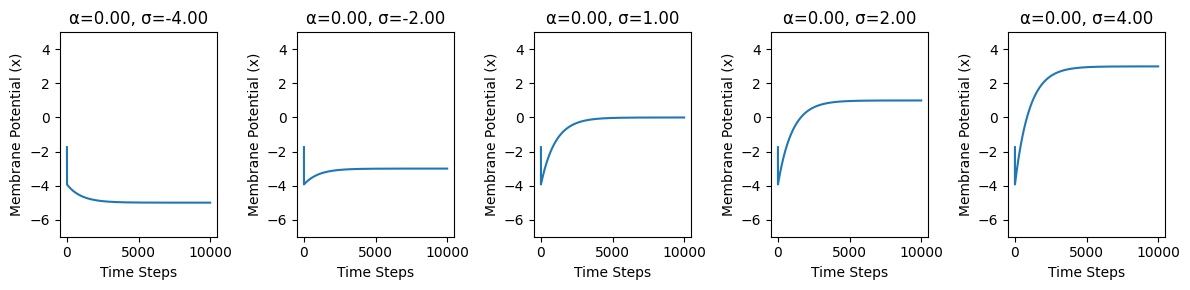

In [227]:
alpha_values = [0]              
sigma_values = [-4, -2, 1, 2, 4]
plot_rulkov_map(alpha_values, sigma_values, steps = 10000, length=12, width=3, y_lim_neg=-7)

No spiking when $\alpha = 0$, with the membrane potential stabilizing to values proportional to $\sigma$.

#### When $\alpha < 0$

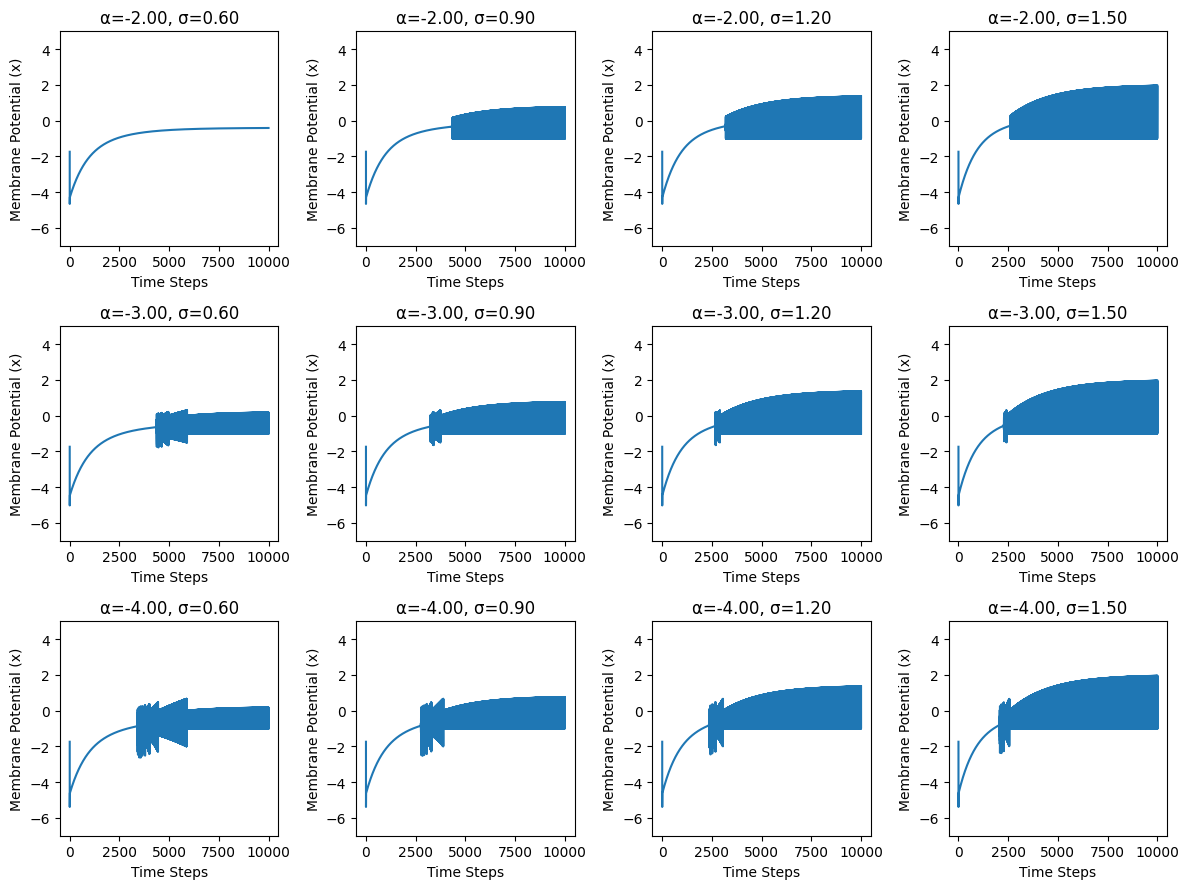

In [236]:
alpha_values = [-2,-3,-4]              
sigma_values = [0.6, 0.9, 1.2, 1.5]
plot_rulkov_map(alpha_values, sigma_values, steps = 10000, length=12, width=9, y_lim_neg=-7)

For a large enough value of $\sigma$ for each negative $\alpha$, the value of the membrane potential destabilizes.

#### Varying $\mu$

We run the three example cases of each behaviour with an increased $\mu = 0.01$

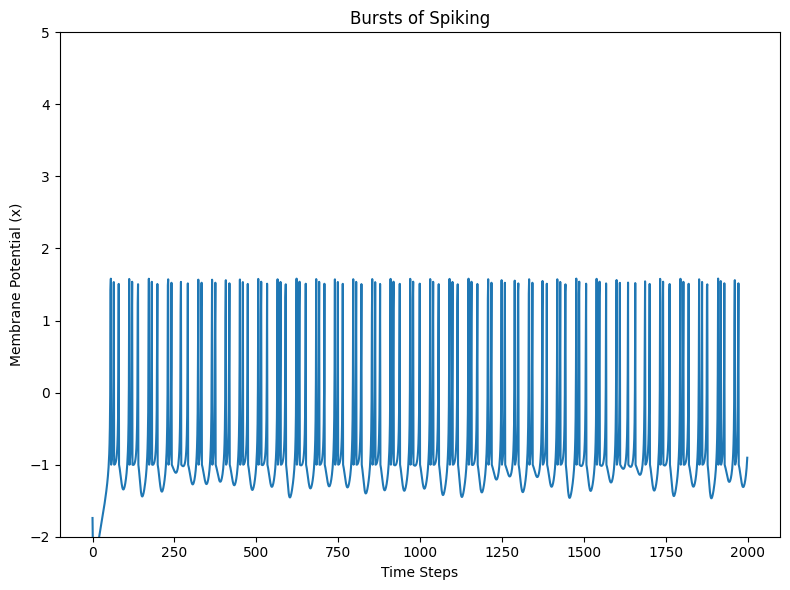

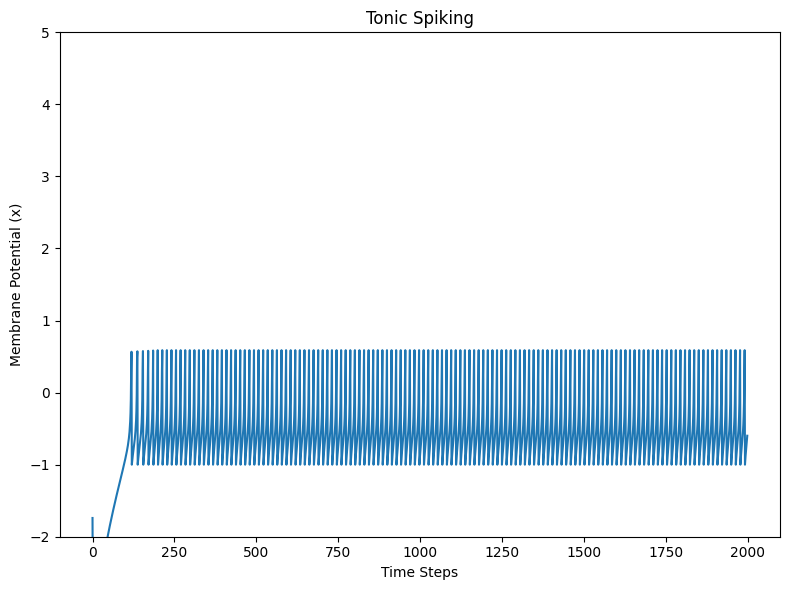

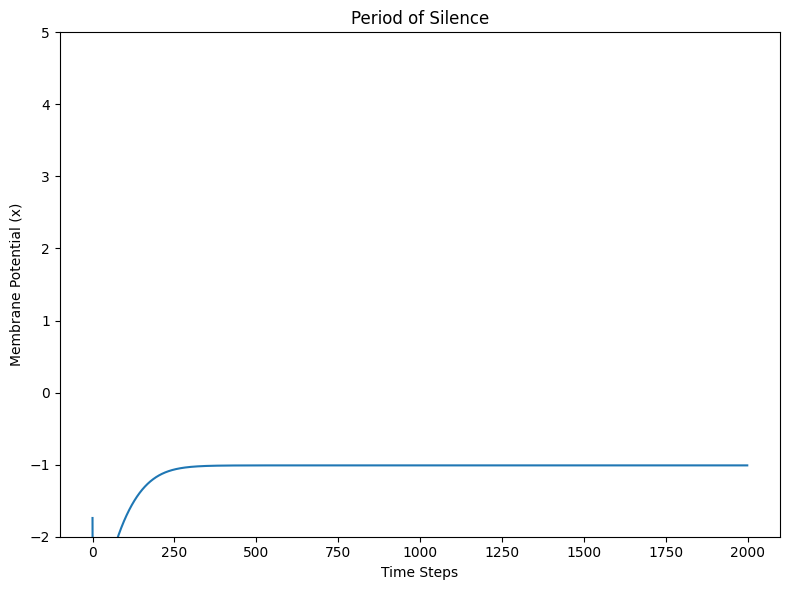

In [252]:
plot_rulkov_case(5.0,0.2, "Bursts of Spiking",  mu = 0.01)
plot_rulkov_case(3.0,0.5, "Tonic Spiking", mu = 0.01)
plot_rulkov_case(2.0,-0.01, "Period of Silence", mu = 0.01)

**Increasing $\mu$ concentrates each behaviour into smaller time scales. It loses the slow component of $y_{n}$ as we keep on increasing $\mu$.**

### Conclusion

| Behaviour    | $\alpha$ | $\sigma$ |
| ------------------ | ------- | ---------------------------------|
| Bursts of Spiking  | > 4    |  $\sigma_{lo} = \sigma_{th}$ and $\sigma_{hi} = a(\alpha-4)^b$ , $b \in (0,1)$    |  
| Tonic Spiking | $\in(0,4]$     | $\sigma_{lo} = \sigma_{th}$ and  $(\sigma_{hi}$ - $\sigma_{lo})$ grows with $\alpha$   |  
| Silent Periods    | $\geq 0$    | $\sigma_{hi} = \sigma_{th}$       |  

where $\sigma_{\text{th}} = 2 - \sqrt{\alpha}$, and $\mu = 0.001$